## Import Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('input/winemag-data_first150k.csv',index_col=0)

In [3]:
df.head()


country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude

## Features
+ Country, designation, points, province, region 1, variety, winery
+ one features for analysing 'description'

In [4]:
description = df['description']

df = df.drop(['description'],axis=1)

## Analysing Data

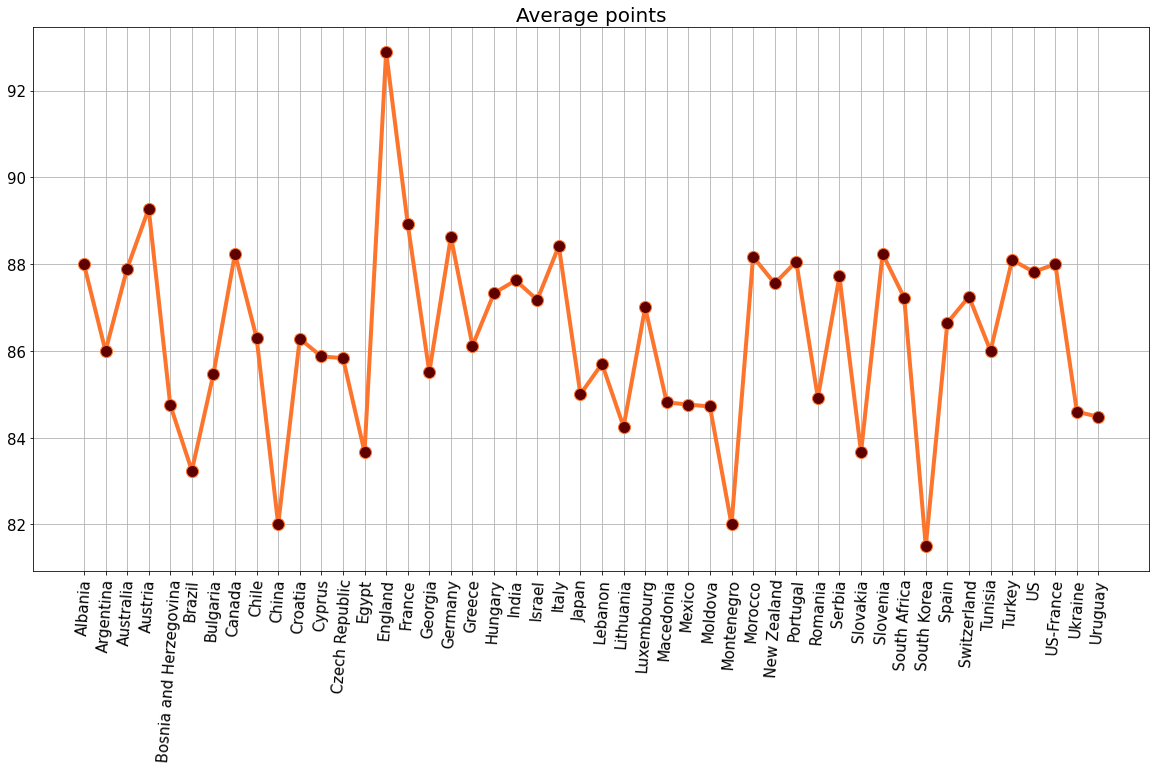

In [5]:
statistics_points = df['points'].groupby(df['country']).mean()
mean_value = [ statistics_points[i] for i in range(len(statistics_points))]

_country = df.country.unique().tolist()

del(_country[22])
_country = sorted(_country)

f = plt.figure(figsize=(20,10))
plt.plot( _country, mean_value,  marker='o', markerfacecolor='#5e0000', markersize=12, color='#fd742d', linewidth=4)
plt.xticks( rotation=86)
plt.tick_params(axis = 'both', labelsize = 15)
plt.grid(True)
plt.title('Average points', fontsize = 20)
plt.show()

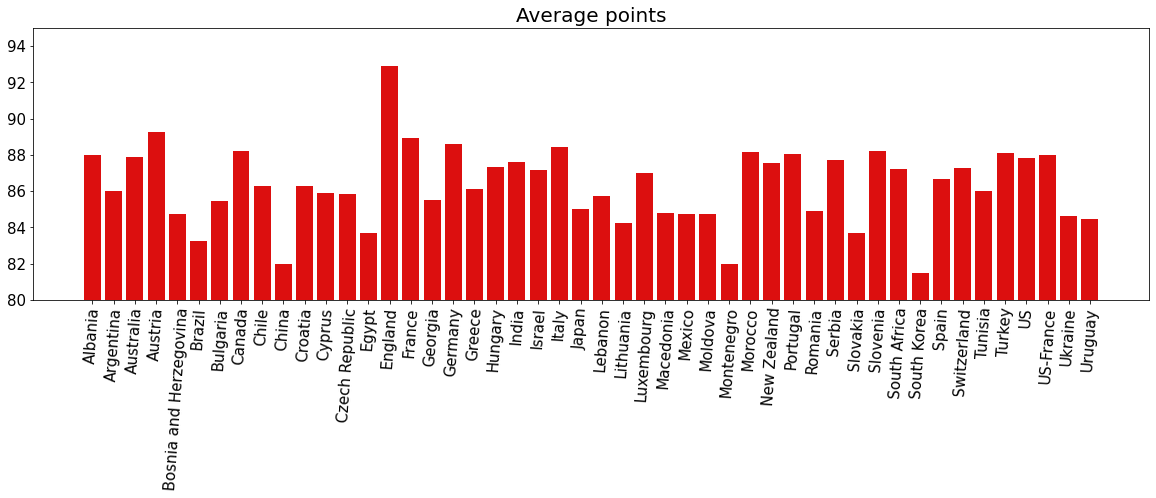

In [6]:
plt.figure(figsize=(20,5))
bars = (_country)
y_pos = np.arange(len(bars))
plt.bar(y_pos, mean_value, color = '#dc0f0f')
plt.xticks(y_pos, bars)
plt.xticks( rotation=86)
plt.ylim(80,95)
plt.title('Average points', fontsize = 20)
plt.tick_params(axis = 'both', labelsize = 15)
plt.show()


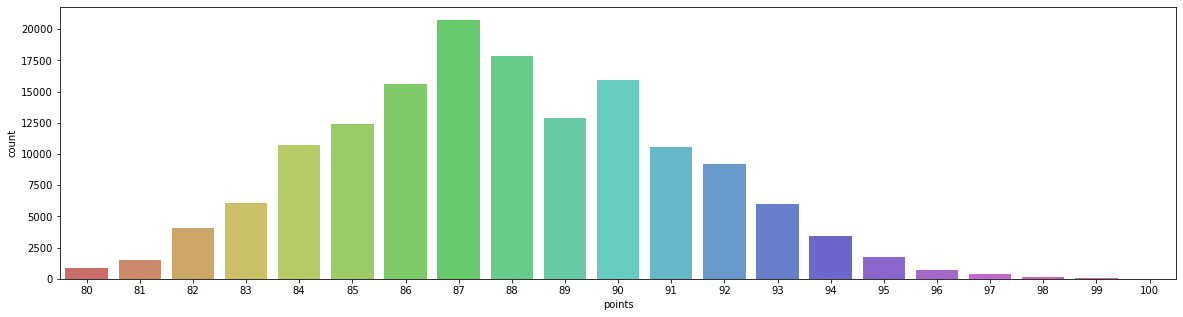

In [7]:
f = plt.figure(figsize=(20,5))
sns.countplot(x='points',data = df, palette='hls' )
plt.show()

## Data wrangling

In [8]:
df.isnull().sum()

country            5
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

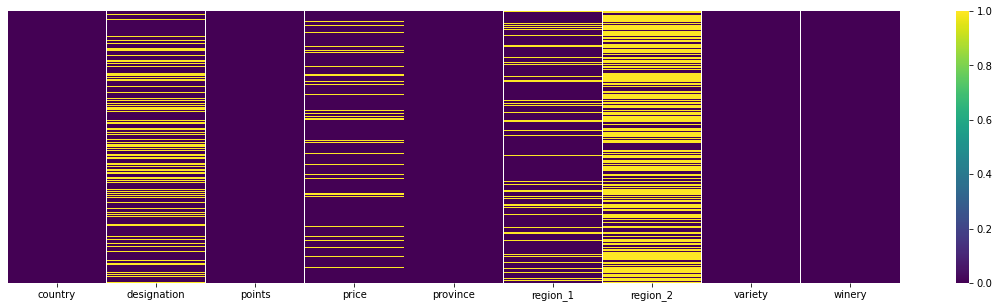

In [9]:
f = plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cmap= 'viridis')

Text(0.0, 1.0, 'Boxplot with jitter')

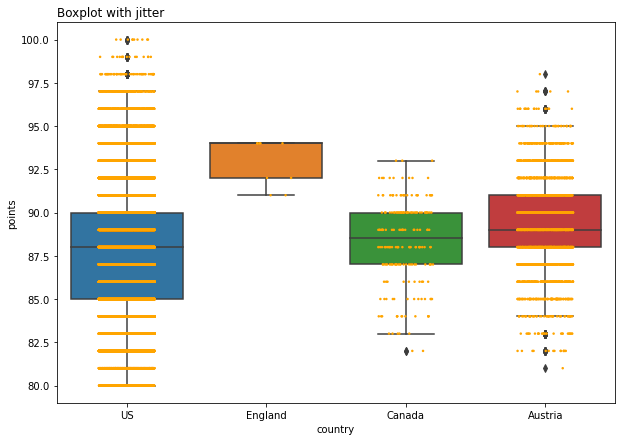

In [10]:
most_country = ['US','England','Canada','Austria']

f = plt.figure(figsize=(10,7))
f = sns.boxplot(x="country",y = "points",data= df, order =most_country )
f = sns.stripplot(x="country",y = "points",data= df, order =most_country, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot with jitter", loc="left")


## Cleaning

In [11]:

# delete features with a lot of NaN
df = df.drop(['region_2','designation'],axis=1)
# replace NaN price by average 
df['price'] = df['price'].fillna(df['price'].mean())
# replace NaN by 'Unknown'
df = df.fillna('Unknown')

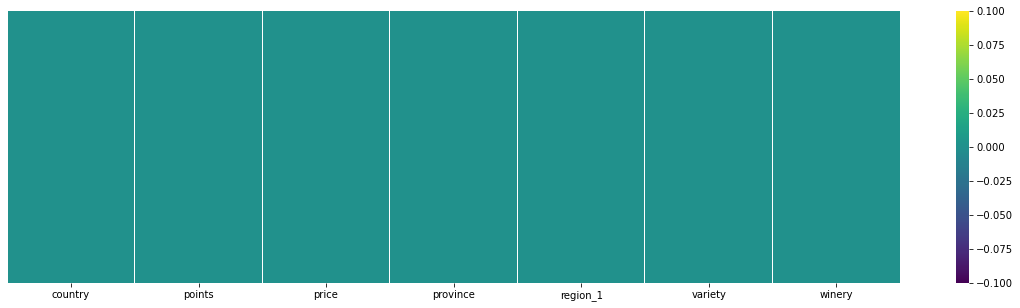

In [12]:
f = plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cmap= 'viridis')